# New O$_3$ analysis over Japan. Part 3

## Init

In [1]:
import urllib.request
import zipfile
import glob, os
import numpy as np
import pandas as pd
import datetime
import seaborn
import matplotlib.pyplot as plt

f_size = 12
reg = ['Hokkaido', 'Tohoku', 'Kanto', 'Chubu', 'Kansai', 'Chugoku', 'Shikoku', 'Kyushu']

## Analysis 2009-2017

### Derive aggregated datasets

In [36]:
def ox_agg(df):
    n_cmn = ['year', 'month', 'day', 'pref', 'region', 'site_id', 'city_id']
    # all
    df_a = df.groupby(n_cmn)['OX'].agg(
        OX_mean = 'mean', OX_median = 'median', OX_std = 'std', OX_max = 'max', OX_min = 'min')
    
    # daytime
    df_t = df[(df.hour >= 10) & (df.hour < 17)]
    df_d = df_t.groupby(n_cmn)['OX'].agg(
        OX_d_mean = 'mean', OX_d_median = 'median', OX_d_std = 'std')

#     print (df_d.head())
#     print (df_a.head())
    df_x = df_a.join(df_d)
    df_x.reset_index(inplace=True)
    df_x['index'] = pd.to_datetime(dict(year=df_x.year, month=df_x.month, 
                                        day=df_x.day), errors='coerce')
    df_x.set_index('index', inplace=True)
#     print (df_x.head())
    return df_x

### Load df

In [37]:
inp_path = '../mid_data/'
year = [2009, 2017]
frames = []
for yr in range(year[0], year[1]+1):
    s_yr = str(yr)
    f_name = '../mid_data/jap_ox_' + s_yr
    try:
        df_r = pd.read_pickle(f_name)
        frames.append(ox_agg(df_r))
    except:
        print(f'No file: {f_name}')
        sys.exit()
    
df_s = pd.concat(frames)
df_t = df_s.copy()
print('\tFull df_t len:', len(df_s))

	Full df_t len: 3808244


In [38]:
pd.set_option('expand_frame_repr', False)
#print(df_t.head())
#print(df_r.head())

### Site number

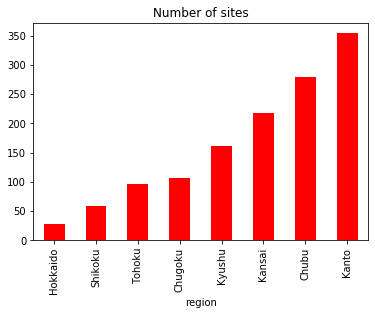

In [39]:
df_t.groupby('region')['site_id'].nunique().sort_values().plot(
    kind='bar', title='Number of sites', facecolor='r', figsize=(6,4));

### Daily cycle

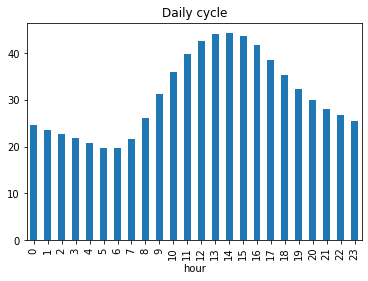

In [40]:
df_r.groupby('hour')['OX'].mean().plot(kind='bar', title='Daily cycle', figsize=(6,4));

### Histogram

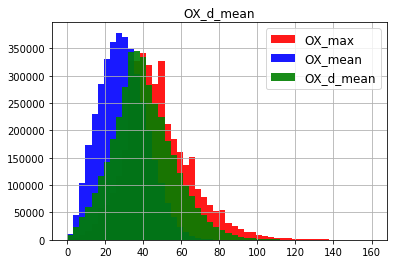

In [41]:
fig, axx = plt.subplots(figsize=(6,4))
df_t.hist('OX_max', bins=50, range=[0, 160], facecolor='r', ax=axx, label='OX_max', alpha=0.9)
df_t.hist('OX_mean', bins=50, range=[0, 160], facecolor='b', ax=axx, label='OX_mean', alpha=0.9)
df_t.hist('OX_d_mean', bins=50, range=[0, 160], facecolor='g', ax=axx, label='OX_d_mean', alpha=0.9)
axx.legend(loc="upper right", ncol=1, fontsize= f_size);

### Region max-min

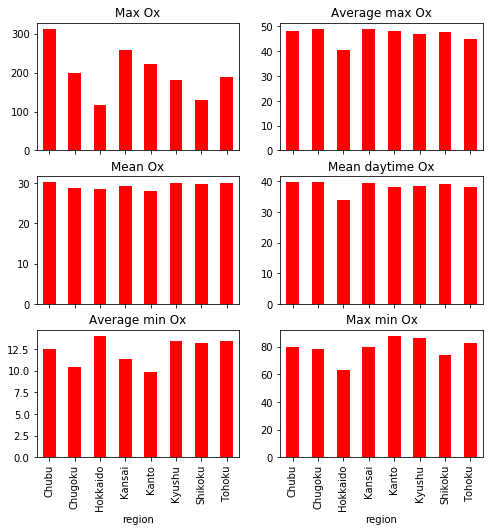

In [52]:
#df_t = df.copy()
fig, axx = plt.subplots(3, 2, figsize=(8, 8), sharex='all')
df_t.groupby('region')['OX_max'].max().plot(
    kind='bar', title='Max Ox', facecolor='r', ax=axx.flat[0]); 
df_t.groupby('region')['OX_max'].mean().plot(
    kind='bar', title='Average max Ox', facecolor='r', ax=axx.flat[1]); 
df_t.groupby('region')['OX_mean'].mean().plot(
    kind='bar', title='Mean Ox', facecolor='r', ax=axx.flat[2]);
df_t.groupby('region')['OX_d_mean'].median().plot(
    kind='bar', title='Mean daytime Ox', facecolor='r', ax=axx.flat[3]);
df_t.groupby('region')['OX_min'].mean().plot(
    kind='bar', title='Average min Ox', facecolor='r', ax=axx.flat[4]); 
df_t.groupby('region')['OX_std'].mean().plot(
    kind='bar', title='Mean std Ox', facecolor='r', ax=axx.flat[5]); 
df_t.groupby('region')['OX_min'].max().plot(
    kind='bar', title='Max min Ox', facecolor='r', ax=axx.flat[5]); 

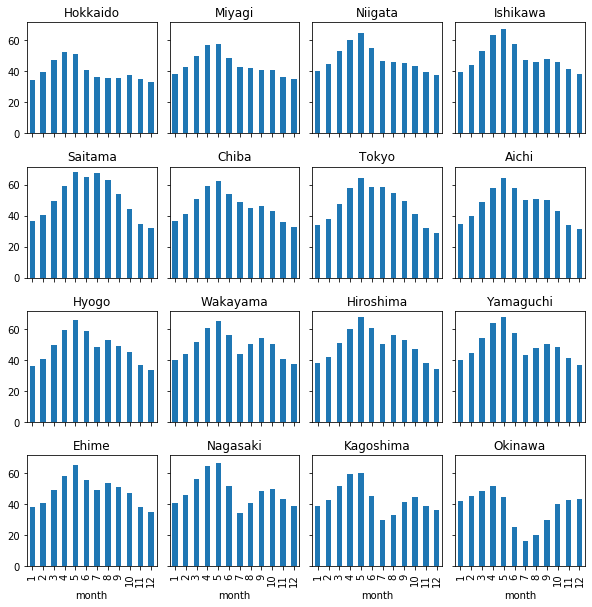

In [43]:
prf = ['Hokkaido', 'Miyagi', 'Niigata', 'Ishikawa', 
       'Saitama', 'Chiba', 'Tokyo', 'Aichi', 
       'Hyogo', 'Wakayama', 'Hiroshima', 'Yamaguchi', 
       'Ehime', 'Nagasaki', 'Kagoshima', 'Okinawa']
fig, axx = plt.subplots(4, 4, figsize=(10,10), sharex='all', sharey='all')
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for j in range(0, len(prf)):
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].mean().plot(
        kind='bar', title=prf[j], ax=axx.flat[j]);

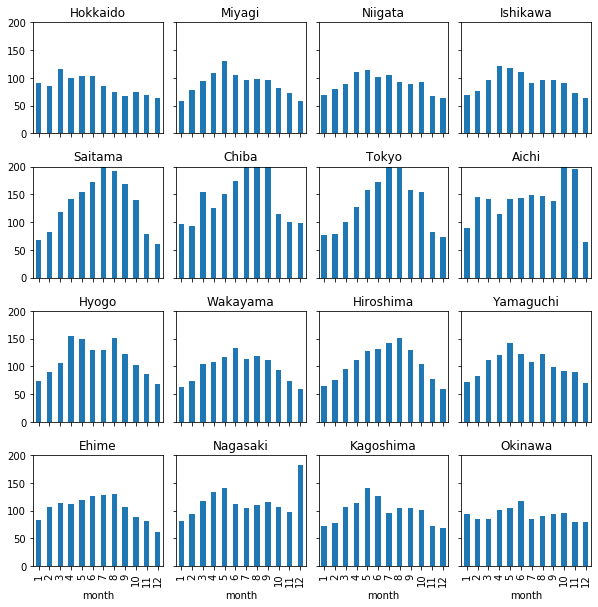

In [44]:
fig, axx = plt.subplots(4, 4, figsize=(10,10), sharex='all', sharey='all')
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for j in range(0, len(prf)):
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].max().plot(
        kind='bar', title=prf[j], ax=axx.flat[j]);
    axx.flat[j].set_ylim(0, 200)

### Kanto

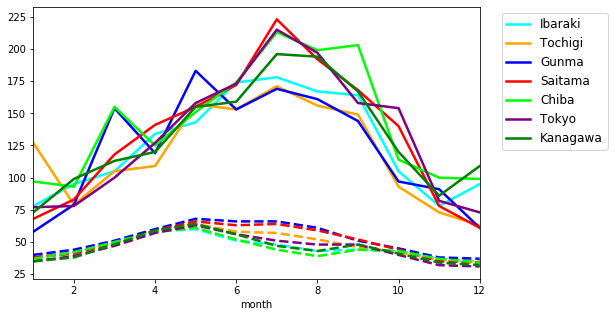

In [57]:
prf = ['Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa']
fig, axx = plt.subplots(figsize=(8,5))
f_size = 12
colors = ['Cyan', 'Orange', 'Blue', 'Red', 'Lime', 'Purple', 'Green', 'Grey']
for j in range(0, len(prf)):
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].max().plot(
        kind='line', lw=2.5, ls='-', color=colors[j], label=prf[j], ax=axx);
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].median().plot(
        kind='line', lw=2.5, ls='--', color=colors[j], label='', ax=axx);
axx.legend(loc="upper right", ncol=1, fontsize= f_size, bbox_to_anchor=(1.3, 1));


### Prefectures North to South

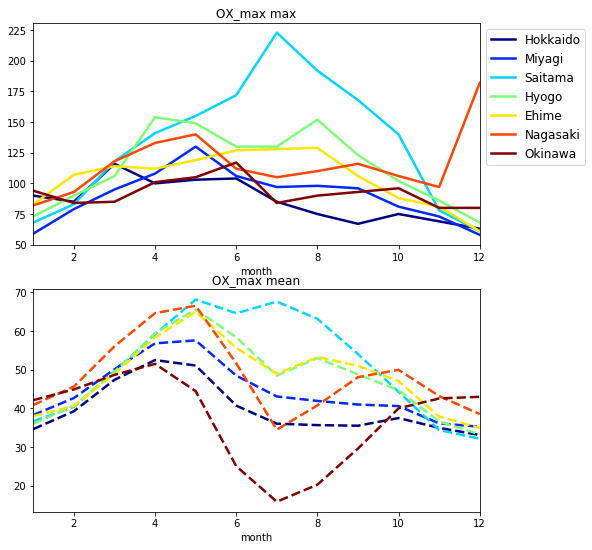

In [54]:
prf = ['Hokkaido', 'Miyagi', # 'Niigata', 'Ishikawa',
       'Saitama', #'Chiba', 'Tokyo',
       'Hyogo',  # 'Wakayama', 'Hiroshima', 'Yamaguchi',
       'Ehime', 'Nagasaki', # 'Kagoshima',
       'Okinawa']
fig, axx = plt.subplots(2, 1, figsize=(8, 9))
number = len(prf)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for j in range(0, len(prf)):
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].max().plot(
        kind='line', lw=2.5, ls='-', color=colors[j], label=prf[j], ax=axx[0])
    df_t.loc[df_t['pref'] == prf[j]].groupby('month')['OX_max'].mean().plot(
        kind='line', lw=2.5, ls='--', color=colors[j], label='', ax=axx[1])
axx[0].set_title('OX_max max', loc='center', y=1.0, fontsize=f_size)
axx[1].set_title('OX_max mean', loc='center', y=1.0, fontsize=f_size);
axx[0].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.25, 1));
#axx[1].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.2, 1));

### Regions

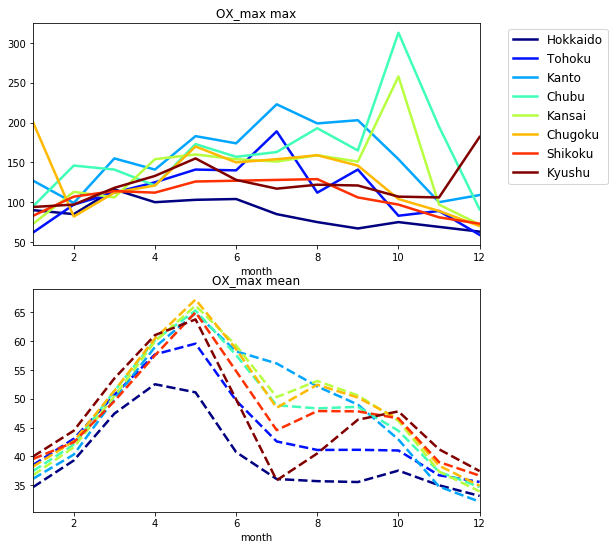

In [59]:
fig, axx = plt.subplots(2, 1, figsize=(8, 9))
number = len(reg)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for j in range(0, len(reg)):
    df_t.loc[df_t['region'] == reg[j]].groupby('month')['OX_max'].max().plot(
        kind='line', lw=2.5, ls='-', color=colors[j], label=reg[j], ax=axx[0])
    df_t.loc[df_t['region'] == reg[j]].groupby('month')['OX_max'].mean().plot(
        kind='line', lw=2.5, ls='--', color=colors[j], label=reg[j], ax=axx[1])

axx[0].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.3, 1))
axx[0].set_title('OX_max max', loc='center', y=1.0, fontsize=f_size)
#axx[1].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.2, 1))
axx[1].set_title('OX_max mean', loc='center', y=1.0, fontsize=f_size);

### Time series

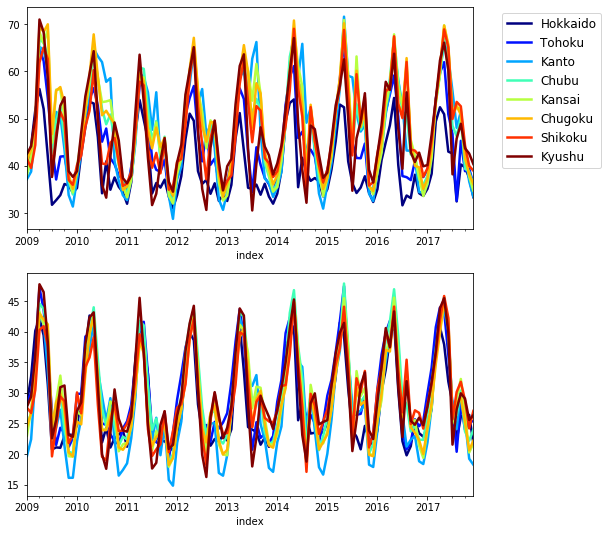

In [60]:
fig, axx = plt.subplots(2, 1, figsize=(8, 9))
number = len(reg)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for j in range(0, len(reg)):
    df_x = df_t.loc[df_t['region'] == reg[j]].resample('M').mean()
    df_x['OX_max'].plot(linewidth=2.5, color=colors[j], label=reg[j], ax=axx[0]);
    df_x['OX_mean'].plot(linewidth=2.5, color=colors[j], label=reg[j], ax=axx[1]);

axx[0].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.3, 1));

### Trend

In [49]:
#fig, axx = plt.subplots(2, 1, figsize=(10, 12))
number = len(reg)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for j in range(0, len(reg)):
    df_x = df_t.loc[df_t['region'] == reg[j]].resample('w').mean()
    #df_x['OX_max'].plot(style='o', markersize=4, label=reg[j], ax=axx[0]);
    #df_x['OX_mean'].plot(style='o', markersize=4, label=reg[j], ax=axx[1]);

axx[0].legend(loc="upper right", ncol=1, fontsize=f_size, bbox_to_anchor=(1.2, 1));

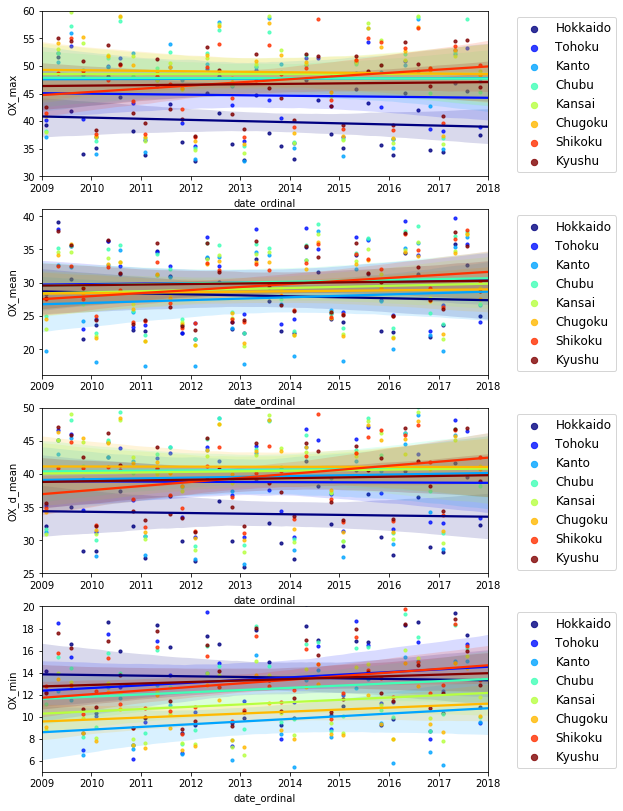

In [71]:
sub = 4
fig, axx = plt.subplots(sub, 1, figsize=(8, 14))
number = len(reg)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for j in range(0, len(reg)):
    df_x = df_t.loc[df_t['region'] == reg[j]].resample('3M').mean()
    df_x.reset_index(inplace=True)
    df_x['date_ordinal'] = pd.to_datetime(df_x['index']).apply(lambda date: date.toordinal())
    seaborn.regplot(data=df_x, x='date_ordinal', y='OX_max', scatter_kws={'s':10}, 
                    color=colors[j], label=reg[j], ax=axx[0])
    seaborn.regplot(data=df_x, x='date_ordinal', y='OX_mean', scatter_kws={'s':10}, 
                    color=colors[j], label=reg[j], ax=axx[1])
    seaborn.regplot(data=df_x, x='date_ordinal', y='OX_d_mean', scatter_kws={'s':10}, 
                    color=colors[j], label=reg[j], ax=axx[2])
    seaborn.regplot(data=df_x, x='date_ordinal', y='OX_min', scatter_kws={'s':10}, 
                    color=colors[j], label=reg[j], ax=axx[3])

for j in range(0, sub):
    axx[j].set_xlim(pd.Timestamp('20090101'), pd.Timestamp('20180101'))
    axx[j].legend(loc="upper right", ncol=1, markerscale=2., fontsize=f_size, bbox_to_anchor=(1.3, 1));
axx[0].set_ylim(30, 60)
axx[2].set_ylim(20, 40);
axx[2].set_ylim(25, 50);
axx[3].set_ylim(5, 20);